In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
from lls import LinearLeastSquares

In [77]:
data = pd.read_csv("housePrice.csv")
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [78]:
data["Parking"].replace(["True","False"],[1,0],inplace=True)
data["Warehouse"].replace(["True","False"],[1,0],inplace=True)
data["Elevator"].replace(["True","False"],[1,0],inplace=True)
data.head()

C:\Users\ComputerKosar\AppData\Local\Temp\ipykernel_26364\3371837746.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Parking"].replace(["True","False"],[1,0],inplace=True)
C:\Users\ComputerKosar\AppData\Local\Temp\ipykernel_26364\3371837746.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [79]:
data.drop("Address",axis=1,inplace=True)

In [80]:
data.head()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
0,63,1,True,True,True,1.850000e+09,61666.67
1,60,1,True,True,True,1.850000e+09,61666.67
2,79,2,True,True,True,5.500000e+08,18333.33
3,95,2,True,True,True,9.025000e+08,30083.33
4,123,2,True,True,True,7.000000e+09,233333.33


In [81]:
data.corr()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
Area,1.000000,0.672959,0.197698,0.076829,0.052384,0.722647,0.722647
Room,0.672959,1.000000,0.274952,0.129956,0.181718,0.567610,0.567610
Parking,0.197698,0.274952,1.000000,0.430804,0.430893,0.190532,0.190532
Warehouse,0.076829,0.129956,0.430804,1.000000,0.201921,0.109971,0.109971
Elevator,0.052384,0.181718,0.430893,0.201921,1.000000,0.111861,0.111861
Price,0.722647,0.567610,0.190532,0.109971,0.111861,1.000000,1.000000
Price(USD),0.722647,0.567610,0.190532,0.109971,0.111861,1.000000,1.000000


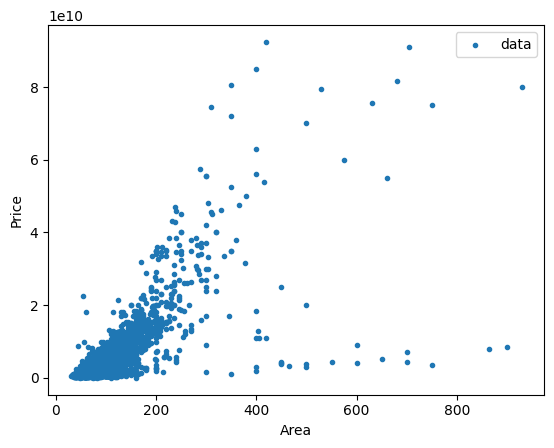

In [82]:
plt.scatter(data["Area"],data["Price"],marker=".")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend(["data"])
plt.show()

In [83]:
X = np.array(data[["Area"]])  # []  به جای استفاده از reshape  از یک براکت دیگه استفاده کردم .
Y = np.array(data[["Price"]])

print(X.shape)
print(Y.shape)

(3473, 1)
(3473, 1)


In [84]:
X_train , X_test , Y_train ,Y_test = train_test_split(X,Y)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2604, 1)
(2604, 1)
(869, 1)
(869, 1)


In [85]:
lls = LinearLeastSquares()
lls.fit(X_train,Y_train)
Y_pred = lls.predict(X_test)

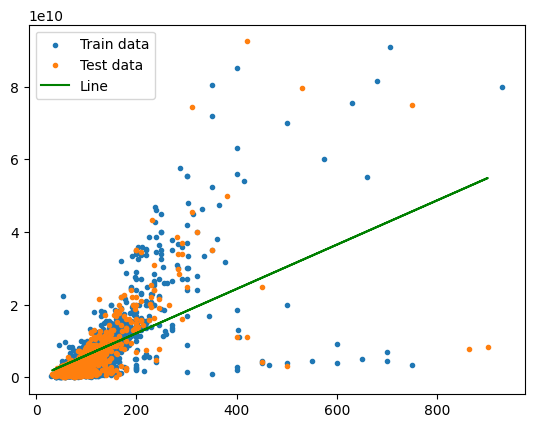

In [86]:
plt.scatter(X_train,Y_train,marker=".")
plt.scatter(X_test,Y_test,marker=".")
plt.plot(X_test,Y_pred,color="green")
plt.legend(["Train data","Test data","Line"])
plt.show()

In [89]:
lls.evaluate(X_test,Y_test,"mae")

3445790673.8814282